In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

#### Animation

In [3]:
def genAnime(fig,ax,t_l,x_l,y_l,latticeHist):
    ims = []
    for i in range(len(t_l)):
        # x, y = np.meshgrid(x_l, y_l)
        # x = x*vorticeHist[i,:,:]
        # y = y*vorticeHist[i,:,:]
        ims.append([ax.imshow(latticeHist[i,:,:],animated=True)])

    ani = animation.ArtistAnimation(
    fig, ims, interval=200,repeat_delay=1000
    )
    return ani
    

In [23]:
file_name = "../data/231019/test_"
t_l = np.loadtxt(file_name+'p_scanx.csv',skiprows=1)
x_l = np.loadtxt(file_name+'p_scany.csv',skiprows=1)
y_l = np.loadtxt(file_name+'p_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'p_data.csv',skiprows=1,delimiter=',')
platticeHist = raw.reshape((len(t_l),len(x_l),len(y_l)),order='F')
raw = np.loadtxt(file_name+'n_data.csv',skiprows=1,delimiter=',')
nlatticeHist = raw.reshape((len(t_l),len(x_l),len(y_l)),order='F')

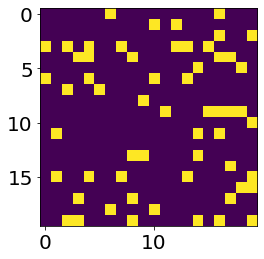

In [10]:
fig, ax = plt.subplots()
ani = genAnime(fig,ax,t_l,x_l,y_l,platticeHist)
HTML(ani.to_jshtml())

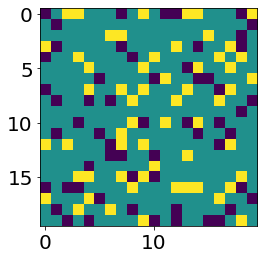

In [25]:
fig, ax = plt.subplots()
ani = genAnime(fig,ax,t_l,x_l,y_l,platticeHist-nlatticeHist)
HTML(ani.to_jshtml())

In [24]:
np.sum(platticeHist,axis=(1,2))-np.sum(nlatticeHist,axis=(1,2))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

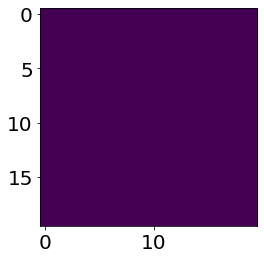

In [22]:
plt.imshow(platticeHist[0,:,:])

#### Correlation

In [44]:
file_name = "../data/231019/1_"
x_l = np.loadtxt(file_name+'pcoor_scanx.csv',skiprows=1)
y_l = np.loadtxt(file_name+'pcoor_scany.csv',skiprows=1)
t_l = np.loadtxt(file_name+'pcoor_scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'pcoor_data.csv',skiprows=1,delimiter=',')
pcoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'ncoor_data.csv',skiprows=1,delimiter=',')
ncoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')
raw = np.loadtxt(file_name+'scoor_data.csv',skiprows=1,delimiter=',')
scoor = raw.reshape((len(x_l),len(y_l),len(t_l)),order='F')

In [45]:
scoor.shape

(20, 20, 100)

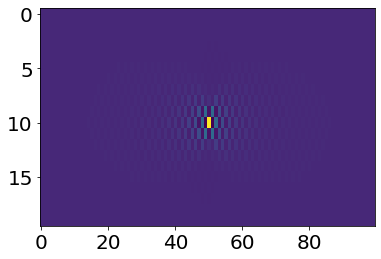

In [55]:
scoor_r = np.roll(scoor[:,0,:],(int(len(x_l)/2),int(len(t_l)/2)),(0,1))
plt.imshow(scoor_r,aspect='auto')

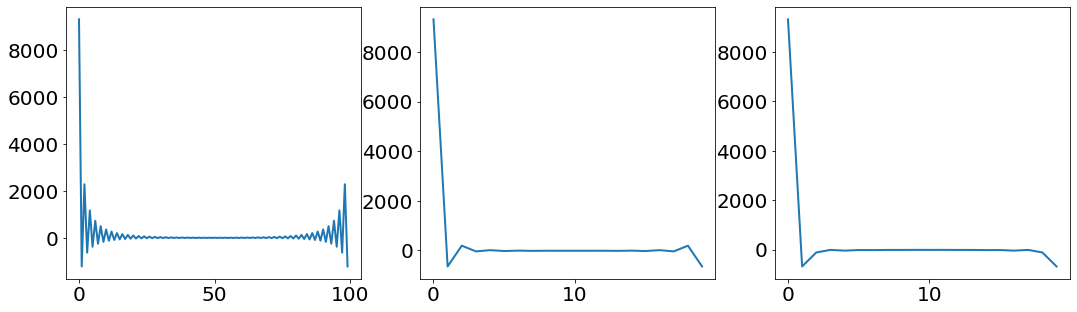

In [35]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.plot(scoor[:,0,0])
plt.subplot(1,3,2)
plt.plot(scoor[0,:,0])
plt.subplot(1,3,3)
plt.plot(scoor[0,0,:])

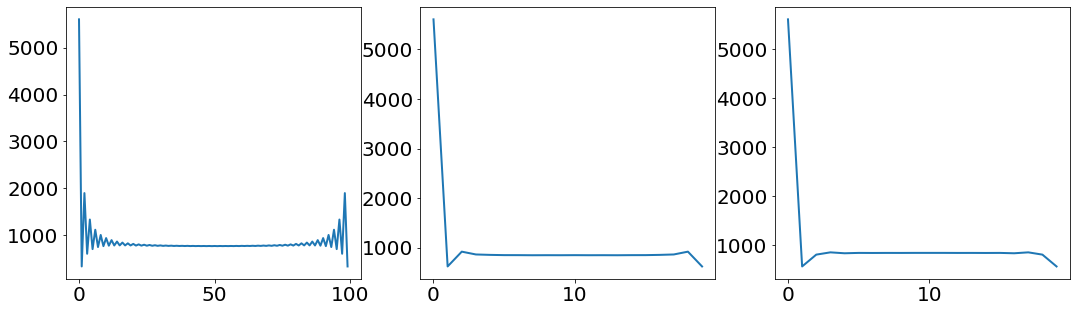

In [37]:
# plt.figure(figsize=(18,5))
# plt.subplot(1,3,1)
# plt.plot(pcoor[:,0,0])
# plt.subplot(1,3,2)
# plt.plot(pcoor[0,:,0])
# plt.subplot(1,3,3)
# plt.plot(pcoor[0,0,:])

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.plot(ncoor[:,0,0])
plt.subplot(1,3,2)
plt.plot(ncoor[0,:,0])
plt.subplot(1,3,3)
plt.plot(ncoor[0,0,:])